**CNN** — это нейронная сеть, которая обрабатывает изображения, выделяя на них локальные признаки (края, текстуры, формы).  
Каждый последующий слой учится видеть всё более сложные паттерны.

**Основные блоки:**
- `Conv2D` — свёртка (извлекает признаки)
- `ReLU` — функция активации (добавляет нелинейность)
- `Pooling` — уменьшает размер карты признаков (например, 2×2 MaxPooling)
- `BatchNorm` — стабилизирует обучение
- `Dropout` — снижает переобучение
- `Flatten` и `Linear/Dense` — финальные слои для классификации
- `Softmax` — распределение вероятностей по классам

**Применения:**
- 🖼️ Классификация изображений (что на картинке?)
- 🎯 Детекция объектов (где и что?)
- 🧩 Сегментация (распознавание областей)
- 🩻 Медицина, спутниковые снимки, распознавание лиц, OCR и др.

## ⚙️ 1. LeNet-5 (1998)

**Автор:** Yann LeCun  
**Задача:** распознавание рукописных цифр (MNIST)  
**Особенности:**
- Первая успешная CNN-архитектура  
- Использует свёртки 5×5, пулинг и 2 полносвязных слоя  
- Простая, но положила начало современным CNN  

**Где используется:** обучение, демо-примеры, базовые задачи 28×28  

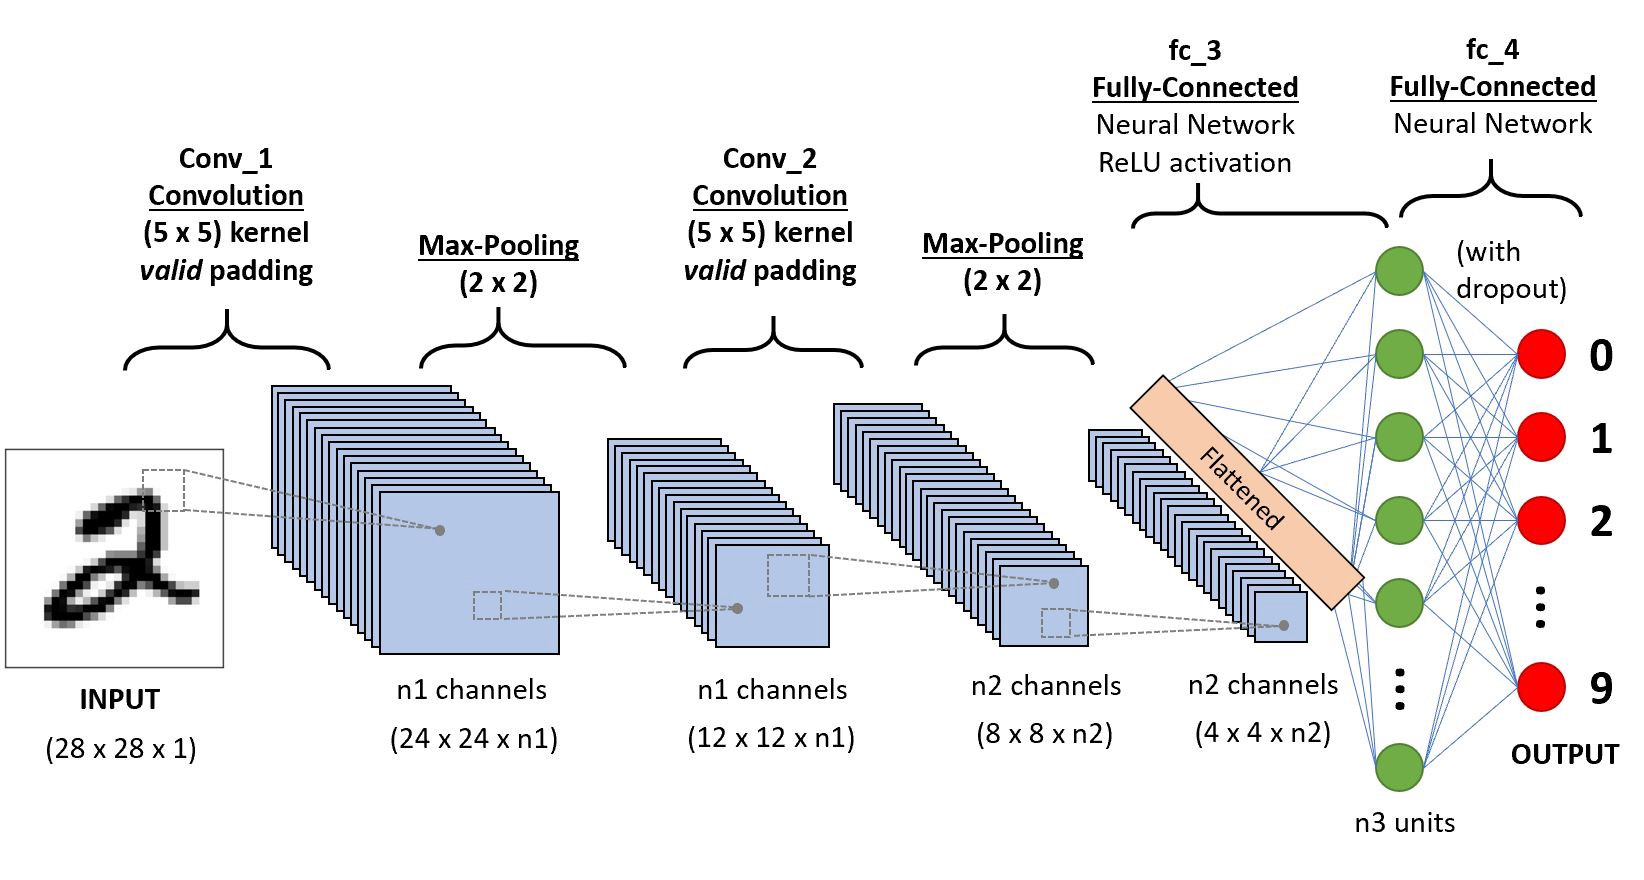

**Есть в библиотеках:** нет встроенной, обычно реализуется вручную.

```python
import torch.nn as nn

class LeNet5(nn.Module):
    def __init__(self, num_classes=10):
        super().__init__()
        self.features = nn.Sequential(
            nn.Conv2d(1, 6, 5), nn.Tanh(), nn.AvgPool2d(2),
            nn.Conv2d(6, 16, 5), nn.Tanh(), nn.AvgPool2d(2)
        )
        self.classifier = nn.Sequential(
            nn.Flatten(),
            nn.Linear(16*4*4, 120), nn.Tanh(),
            nn.Linear(120, 84), nn.Tanh(),
            nn.Linear(84, num_classes)
        )
    def forward(self, x):
        return self.classifier(self.features(x))
```

## ⚙️ 2. AlexNet (2012)

**Автор:** Alex Krizhevsky, Geoffrey Hinton

**Фишка:** первая глубокая CNN, “взорвавшая” ImageNet (точность + GPU-обучение)

**Особенности:**
- ReLU вместо tanh → ускорило обучение 
- Dropout для регуляризации
- Local Response Normalization (LRN)
- Крупные фильтры 11×11 и 5×5 в первых слоях

**Где используется:** классификация изображений, базовая архитектура для экспериментов

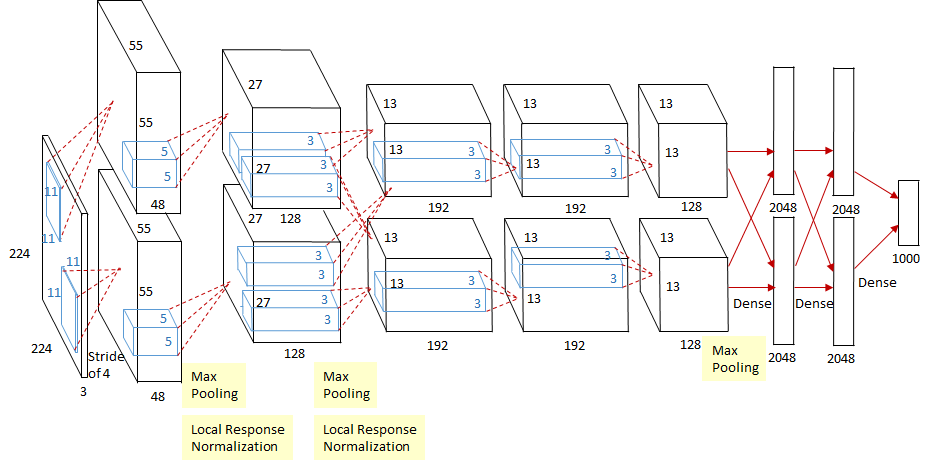

**Есть в библиотеках:** torchvision, timm

```python
from torchvision import models
alexnet = models.alexnet(weights=models.AlexNet_Weights.IMAGENET1K_V1)

```

## ⚙️ 3. VGG-16 / VGG-19 (2014)

**Автор:** Oxford Visual Geometry Group

**Фишка:** заменить большие фильтры на несколько маленьких 3×3, чтобы увеличить глубину сети.

**Особенности:**
- Все свёртки 3×3, пулинг 2×2
- Простая и понятная архитектура
- Очень много параметров (≈138 млн)
- Хорошая модель для transfer learning

**Где используется:** классификация, feature extraction, baseline для других задач.

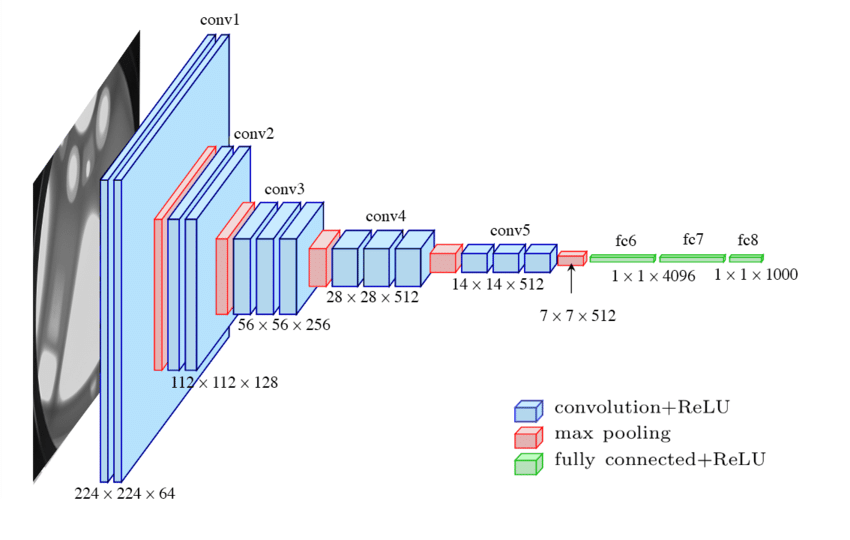

**Есть в библиотеках:** torchvision, keras, timm, TF Hub 

```python
from torchvision import models
vgg16 = models.vgg16(weights=models.VGG16_Weights.IMAGENET1K_V1)

```

## ⚙️ 4. GoogLeNet / Inception v1–v4 (2014–2016)

**Идея:** объединить свёртки разных размеров (1×1, 3×3, 5×5) в один блок → “Inception-модуль”.

**Особенности:**
- Параллельные ветви с разными ядрами
- 1×1 свёртки для уменьшения размерности (экономия параметров)
- Более компактная, чем VGG

**Где используется:** классификация, feature extraction, baseline для других задач.

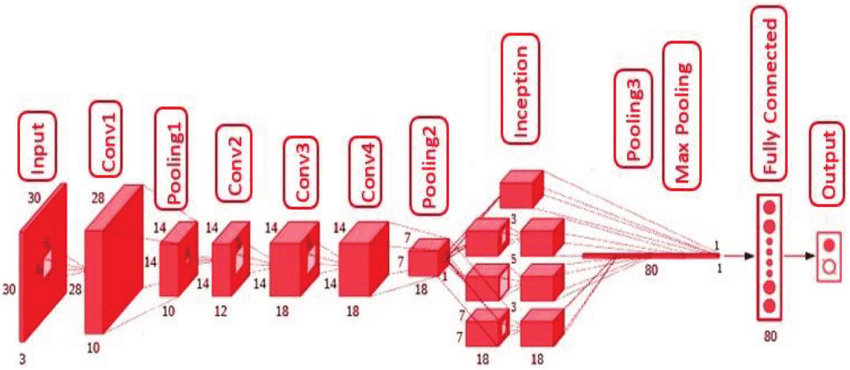

**Есть в библиотеках:** torchvision, keras, timm, TF Hub  

```python
from torchvision import models
googlenet = models.googlenet(weights=models.GoogLeNet_Weights.IMAGENET1K_V1)
inception_v3 = models.inception_v3(weights=models.Inception_V3_Weights.IMAGENET1K_V1)

```

## ⚙️ 5. ResNet (2015)

**Идея:** обучать очень глубокие сети с помощью residual connections (skip connections).

**Особенности:**
- Блоки: Conv → BN → ReLU → Conv → BN + skip connection
- Решает проблему затухания градиента
- Возможна глубина до сотен слоёв
- “Классика” для большинства задач

**Где используется:** классификация, детекция, сегментация (в качестве backbone)

**Популярные варианты:** ResNet-18, ResNet-34, ResNet-50, ResNet-101, ResNet-152

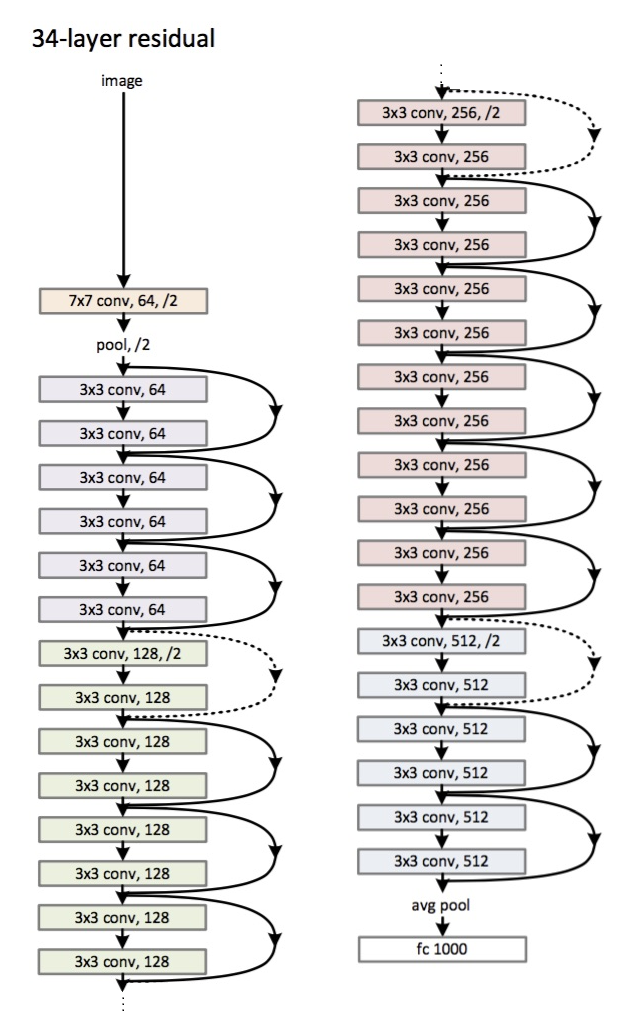

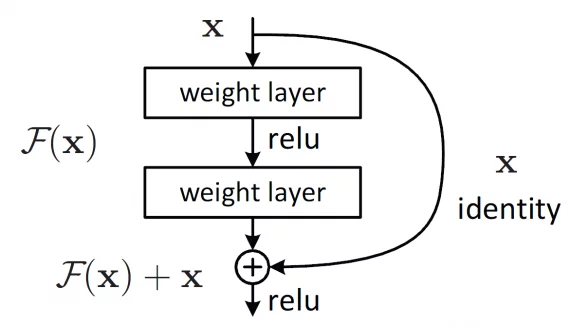

**Есть в библиотеках:** torchvision, keras, timm, TF Hub  

```python
from torchvision import models
resnet50 = models.resnet50(weights=models.ResNet50_Weights.IMAGENET1K_V1)
```

## ⚙️ 6. DenseNet (2017)

**Идея:** каждый слой получает на вход все предыдущие (dense connections).

**Особенности:**
- Улучшает распространение градиента
- Меньше параметров, чем ResNet при равной точности
- Легко использовать как фич-экстрактор

**Где используется:** классификация, медицина, детекция признаков

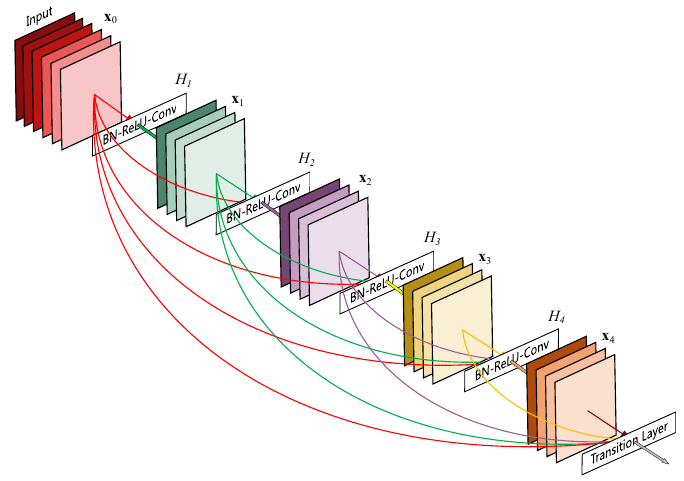

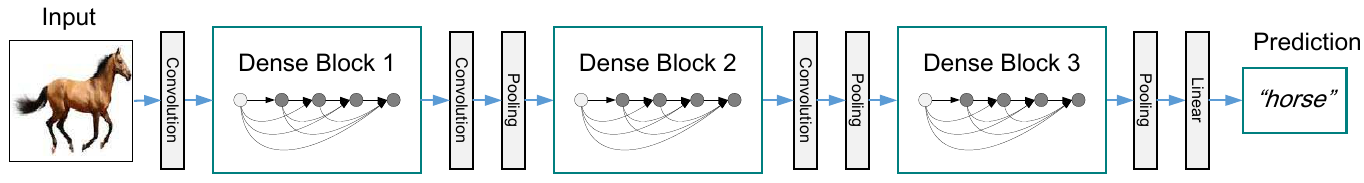

**Есть в библиотеках:** torchvision, keras, timm, TF Hub  

```python
from torchvision import models
densenet121 = models.densenet121(weights=models.DenseNet121_Weights.IMAGENET1K_V1)
```

## ⚙️ 7. SqueezeNet (2016)

**Идея:** сделать сеть с малым числом параметров, но хорошей точностью. Построен на принципе “сжать-расширить” (squeeze-expand). Fire модули сначала уменьшают количество каналов свертками 1×1 (squeeze), а затем расширяют их через параллельные 1×1 и 3×3 свертки (expand). Результат — компактная модель с хорошим качеством.

**Особенности:**
- Fire-модули: “squeeze” 1×1 → “expand” 1×1 и 3×3
- Размер модели < 5 МБ (в 50 раз меньше AlexNet)

**Где используется:** мобильные и встроенные устройства

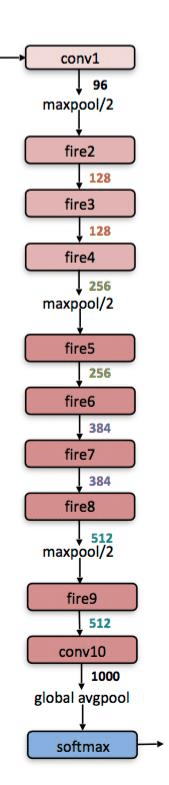

**Есть в библиотеках:** torchvision, timm

```python
from torchvision import models
squeezenet = models.squeezenet1_0(weights=models.SqueezeNet1_0_Weights.IMAGENET1K_V1)
```

## ⚙️ 8. MobileNet (V1, V2, V3)

**Идея:** ускорить свёртки с помощью Depthwise Separable Convolutions
(сначала по каналам, потом 1×1 pointwise).

**Особенности:**
- V1 — базовая версия (2017)
- V2 — “inverted residuals” + BatchNorm
- V3 — NAS-оптимизация + Efficient swish activation

**Где используется:** мобильные устройства, real-time детекция.

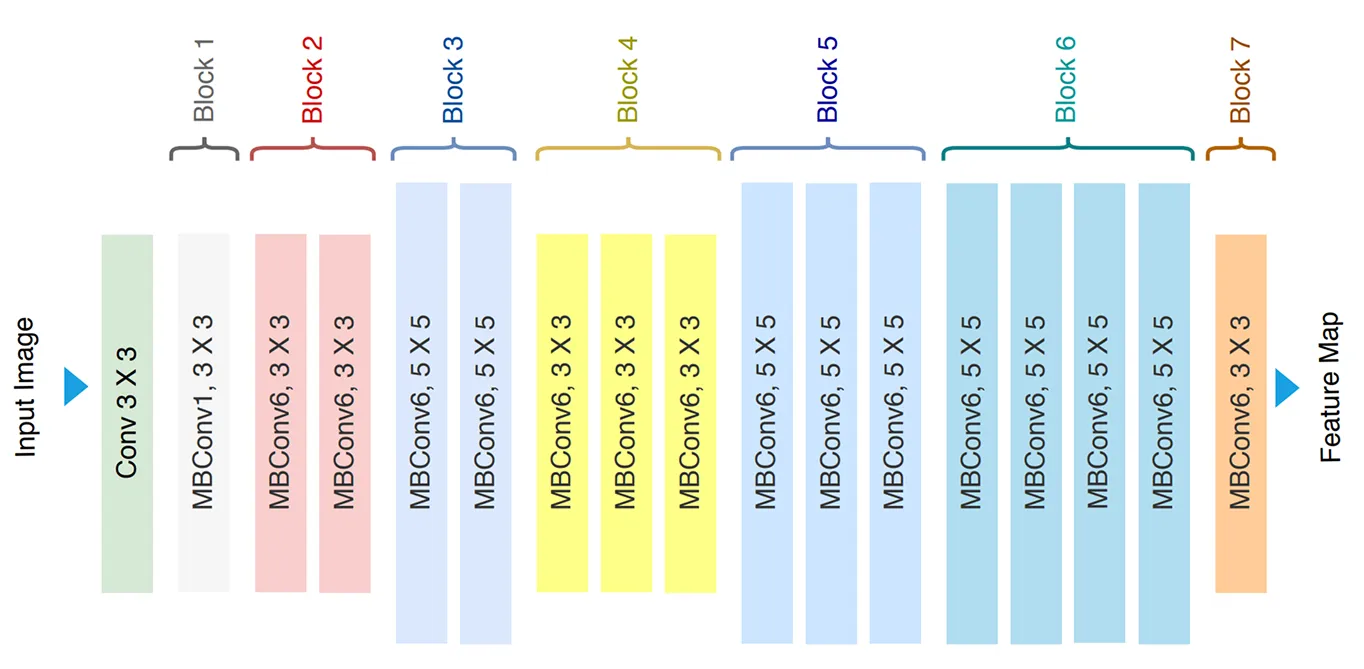

Он основан на MobileNetV2, облегченной модели компьютерного зрения, оптимизированной для мобильных и встроенных устройств. В его основе лежит блок Mobile Inverted Bottleneck Convolution (MBConv), специальный слой, который обрабатывает данные изображения, как стандартная свертка, но с меньшим количеством вычислений. Этот блок делает модель быстрой и более эффективной по памяти.

Внутри каждого блока MBConv находится модуль squeeze-and-excitation (SE). Этот модуль регулирует силу различных каналов в сети. Он усиливает силу основных каналов и уменьшает силу других. Модуль помогает сети сосредоточиться на наиболее важных особенностях изображения, игнорируя остальные. Модель EfficientNet также использует функцию активации Swish (математическую функцию, которая помогает сети изучать закономерности), которая помогает ей обнаруживать закономерности в изображениях лучше, чем старые методы. 

Кроме того, используется DropConnect, при котором некоторые соединения внутри сети случайным образом отключаются во время обучения. Этот метод стохастической регуляризации (метод рандомизации для предотвращения запоминания моделью обучающих данных вместо обобщения) уменьшает переобучение, заставляя сеть изучать более надежные представления признаков (более сильные, более общие закономерности в данных), которые лучше переносятся на невидимые данные.

**Есть в библиотеках:** torchvision, keras, timm, TF Hub  

```python
from torchvision import models
mobilenet_v3 = models.mobilenet_v3_large(weights=models.MobileNet_V3_Large_Weights.IMAGENET1K_V1)
```

## ⚙️ 9. EfficientNet (2019)

**Идея:** “compound scaling” — одновременно масштабировать ширину, глубину и разрешение сети. EfficientNet применил другой подход. Он увеличил глубину (количество слоев), ширину (количество юнитов в каждом слое) и разрешение изображения (уровень детализации входных изображений) вместе сбалансированным образом. Этот метод, называемый составным масштабированием, надежно использует всю доступную вычислительную мощность. Конечным результатом является меньшая и более быстрая модель, которая может работать лучше, чем старые модели, такие как ResNet или DenseNet.

**Особенности:**
- Очень хорошее соотношение точность/скорость
- Используется как базовая архитектура во многих задачах
- Варианты: B0–B7 (от лёгких к мощным)

**Где используется:** классификация, детекция, сегментация (EfficientDet).

**Есть в библиотеках:** torchvision, keras, timm, TF Hub  

```python
from torchvision import models
efficientnet_b0 = models.efficientnet_b0(weights=models.EfficientNet_B0_Weights.IMAGENET1K_V1)
```

## 🧭 Как выбрать архитектуру

| Цель | Рекомендуемые архитектуры |
|------|----------------------------|
| 🔹 Классификация (точность) | ResNet-50, DenseNet-121, EfficientNet-B4 |
| ⚡ Классификация (скорость) | MobileNetV3, ShuffleNet, EfficientNet-B0 |
| 🧩 Сегментация | DeepLabv3, U-Net |
| 🎯 Детекция | YOLOv8, Faster R-CNN, RetinaNet |
| 💡 Transfer learning | VGG-16, ResNet-50, EfficientNet |
| 📱 Мобильные устройства | SqueezeNet, MobileNet, ShuffleNet |